<a href="https://colab.research.google.com/github/xaximpvp2/master/blob/main/codigo_aula21_topico_adicional_resolvendo_microchip_usando_RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resolvendo problema microchip via redes neurais


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.keras.backend.set_floatx('float64')

tf.autograph.set_verbosity(0)

## Carregando os dados:

In [ ]:
file = open('dados_microchip.txt') # As duas primeiras colunas referem-se às características -> resultados obtidos pelos microchips nos teste 1 e 2
                                   # A terceira (última) coluna refere-se ao resultado do teste de GQ (1 significa chip aprovado)
dados = np.loadtxt(file, delimiter=",")

X = dados[:,0:2]
y = dados[:,-1] # pega apenas a última coluna.

Vizualizando numericamente os dados:

In [ ]:
# print X_train
print("X:", X[:5])
print("Tipo do X:",type(X))

# print y_train
print("y:", y[:5])
print("Tipo do y:",type(y))

X: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Tipo do X: <class 'numpy.ndarray'>
y: [1. 1. 1. 1. 1.]
Tipo do y: <class 'numpy.ndarray'>


#### Cheque as dimensões das suas variáveis


Uma outra forma útil para se familizarizar com os dados é visualizar suas dimensões.
Vamos dar print dos shapes de `X` e `y`para verificar quantas amostras nós temos no nosso conjunto de dados.


In [ ]:
print ('O shape de X é: ' + str(X.shape))
print ('O shape de y é: ' + str(y.shape))
print ('Nós temos %d exemplos (amostras)' % (len(y)))

O shape de X é: (118, 2)
O shape de y é: (118,)
Nós temos 118 exemplos (amostras)


Plotando os dados:

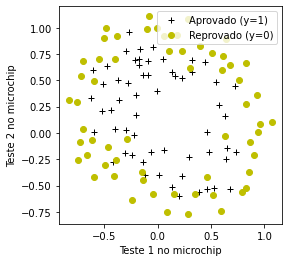

In [ ]:
pos = y == 1 # identifica os elementos em y que são iguais a 1
neg = y == 0 # identifica os elementos em y que são iguais a 0

fig,ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(X[pos,0], X[pos,1], 'k+', label="Aprovado (y=1)")
ax.plot(X[neg,0], X[neg,1], 'yo', label="Reprovado (y=0)")

#ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('Teste 2 no microchip')
ax.set_xlabel('Teste 1 no microchip')
ax.legend()
plt.show()

A figura acima mostra que nosso conjunto de dados não pode ser separado em amostras positivas e negativas usando uma reta. Logo, uma aplicação direta da Regressão Logística não irá performar bem nesse conjunto de dados uma vez que a Regressão Logística não conseguirá encontrar uma Fronteira de Decisão linear adequada.

Por outro lado, sabemos que redes neurais são capazes de criar características complexas naturalmente, por vezes prescindindo da necessidade de realização de uma engenharia de características.

Abaixo nós dividimos os dados entre dados de treinamento e dados de teste:

In [ ]:
from sklearn.model_selection import train_test_split

# Dividindo os dados.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)

print(y_train.shape, y_test.shape)

(82,) (36,)


### Mapeamento de características


Não será necessário neste exemplo, pois usaremos redes neurais ao invés de Regressão Logística

## Modelo simples

Abaixo criamos uma rede neural simples para tentar resolver tal problema de classificação.

In [ ]:
tf.random.set_seed(1234)
modelo_simples = Sequential(
    [
        # Insira seu código aqui
    ], name = "Modelo_simples"
)
modelo_simples.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
)
modelo_simples.fit(
    X_train,y_train,
    epochs=1000
)

Epoch 1/1000
3/3 [==============================] - 1s 10ms/step - loss: 0.7000
Epoch 2/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.6873
Epoch 3/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6799
Epoch 4/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.6738
Epoch 5/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.6706
Epoch 6/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.6676
Epoch 7/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.6641
Epoch 8/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6613
Epoch 9/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.6590
Epoch 10/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.6567
Epoch 11/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.6540
Epoch 12/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.6523
Epoch 13/1000
3/3 [============================

3/3 [==============================] - 0s 6ms/step - loss: 0.4037
Epoch 205/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.4049
Epoch 206/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4037
Epoch 207/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4048
Epoch 208/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4019
Epoch 209/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.4017
Epoch 210/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.4016
Epoch 211/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.4030
Epoch 212/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.4013
Epoch 213/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.3997
Epoch 214/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4019
Epoch 215/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.4018
Epoch 216/1000
3/3 [=======================

3/3 [==============================] - 0s 4ms/step - loss: 0.3706
Epoch 407/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.3710
Epoch 408/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.3713
Epoch 409/1000
3/3 [==============================] - 0s 0s/step - loss: 0.3710
Epoch 410/1000
3/3 [==============================] - 0s 0s/step - loss: 0.3712
Epoch 411/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.3707
Epoch 412/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3703
Epoch 413/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.3697
Epoch 414/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.3715
Epoch 415/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.3684
Epoch 416/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.3693
Epoch 417/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.3696
Epoch 418/1000
3/3 [=========================

3/3 [==============================] - 0s 3ms/step - loss: 0.3615
Epoch 609/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.3607
Epoch 610/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3619
Epoch 611/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3632
Epoch 612/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.3619
Epoch 613/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3600
Epoch 614/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3604
Epoch 615/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.3619
Epoch 616/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.3610
Epoch 617/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.3621
Epoch 618/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.3603
Epoch 619/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.3617
Epoch 620/1000
3/3 [=======================

3/3 [==============================] - 0s 6ms/step - loss: 0.3572
Epoch 811/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.3573
Epoch 812/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.3557
Epoch 813/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.3568
Epoch 814/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.3573
Epoch 815/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.3578
Epoch 816/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.3580
Epoch 817/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.3590
Epoch 818/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.3576
Epoch 819/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.3577
Epoch 820/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.3566
Epoch 821/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.3575
Epoch 822/1000
3/3 [=======================

In [ ]:
modelo_simples.summary()

Model: "Modelo_simples"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 2)                 14        
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


1225/1225 [==============================] - 2s 2ms/step


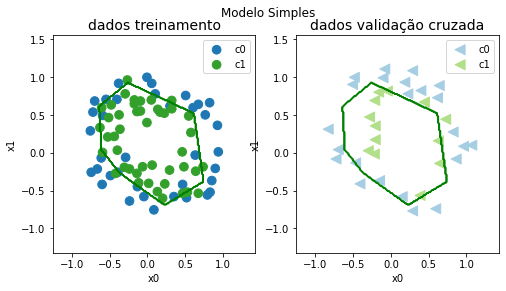

In [ ]:
from nossa_biblioteca_de_funcoes import * # importa funções auxiliares

classes = 2 # quantidade de classes

#abaixo criamos um modelo para realizar previsões. Deixamos em aberto quem será a matriz de características de entrada Xl.
modelo_previsao_simples = lambda Xl: np.argmax(tf.nn.softmax(modelo_simples.predict(Xl)).numpy(),axis=1)

plt_nn(modelo_previsao_simples,X_train,y_train, classes, X_test, y_test, suptitle="Modelo Simples")

In [ ]:
# Escreva um código capaz de calcular a taxa de acerto para os dados de teste


print(f"taxa de acerto para os dados de teste: {taxa_acerto_test}")


NameError: name 'taxa_acerto_test' is not defined

In [ ]:
import seaborn as sns

def plotando_matriz_de_confusao(y, y_hat, rotulos):
  matriz_confusao = tf.math.confusion_matrix(y, y_hat)
  ax = sns.heatmap(matriz_confusao, annot=True, fmt='g')
  sns.set(rc={'figure.figsize':(12, 12)})
  sns.set(font_scale=1.4)
  ax.set_title('Matriz de confusão')
  ax.set_xlabel('Previsão')
  ax.set_ylabel('Valor verdadeiro')
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)
  ax.xaxis.set_ticklabels(rotulos)
  ax.yaxis.set_ticklabels(rotulos)

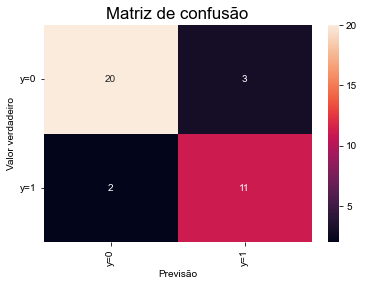

In [ ]:
rotulos = ["y=0","y=1"]

plotando_matriz_de_confusao(y_test, Yhat, rotulos)

In [ ]:
precisao, recall = calculando_metricas_classificacao(y_test, Yhat, rotulos)

print("precisao: ", precisao)

print("recall: ", recall)

precisao:  {'y=0': 0.9090909090909091, 'y=1': 0.7857142857142857}
recall:  {'y=0': 0.8695652173913043, 'y=1': 0.8461538461538461}
